In [5]:
import keras
import numpy as np
from   sklearn.datasets import make_classification
from   sklearn.model_selection import train_test_split

In [6]:
X, y = make_classification(n_samples=2000, n_features=4, random_state=32)

In [7]:
X.shape

(2000, 4)

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.25)

In [9]:
xtrain.shape[1:]

(4,)

In [29]:
from keras_tuner import HyperParameters
def buildModel(hp:HyperParameters):
    #
    n_hidden  = hp.Int(name='n_hidden', min_value=4, max_value=8 ,step=1)
    n_neurons = hp.Int(name='n_neurons', min_value=4,max_value=32, step=4)
    #
    momentum  = hp.Float(name='momentum', min_value=0.0, max_value=0.9, step=0.1)
    nesterov  = hp.Choice(name='nesterov', values=[True,False])

    model = keras.models.Sequential()
    model.add(
        keras.layers.InputLayer(input_shape=xtrain.shape[1:])
    )
    
    for _ in range(n_hidden):
        model.add(
            keras.layers.Dense( units=n_neurons , activation='relu')
        )
    
    model.add( keras.layers.Dense( units=1 , activation='relu') )

    model.compile(
        optimizer = keras.optimizers.SGD(momentum=momentum, nesterov=True),
        loss      = keras.losses.binary_crossentropy,
        metrics   = ['accuracy',keras.metrics.binary_accuracy] 
    )
    return model

In [46]:
from keras_tuner import RandomSearch

grid = RandomSearch(
    buildModel,
    objective='val_accuracy',
    max_trials=10,
    directory='Opt',
    project_name='Example1'
    )

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
grid.search( xtrain, ytrain, epochs=20, validation_split=0.1, callbacks=[stop_early])

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.5400000214576721

Best val_accuracy So Far: 0.9666666388511658
Total elapsed time: 19d 14h 00m 37s


In [50]:
grid.results_summary(num_trials=1)

Results summary
Results in Opt/Example1
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
n_hidden: 4
n_neurons: 20
momentum: 0.30000000000000004
nesterov: 1
Score: 0.9666666388511658


In [48]:
best = grid.get_best_models()[0]

In [49]:

history = best.fit(xtrain, ytrain, epochs=20,batch_size=10 ,validation_split=0.1)

Epoch 1/20
135/135 [==============================] - 1s 3ms/step - loss: 0.2227 - accuracy: 0.9393 - binary_accuracy: 0.9393 - val_loss: 0.3341 - val_accuracy: 0.9333 - val_binary_accuracy: 0.9333
Epoch 2/20
135/135 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.9111 - binary_accuracy: 0.9111 - val_loss: 0.2891 - val_accuracy: 0.9467 - val_binary_accuracy: 0.9467
Epoch 3/20
135/135 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.9437 - binary_accuracy: 0.9437 - val_loss: 0.2175 - val_accuracy: 0.9533 - val_binary_accuracy: 0.9533
Epoch 4/20
135/135 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.9444 - binary_accuracy: 0.9444 - val_loss: 0.2729 - val_accuracy: 0.9533 - val_binary_accuracy: 0.9533
Epoch 5/20
135/135 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.9141 - binary_accuracy: 0.9141 - val_loss: 0.3047 - val_accuracy: 0.9467 - val_binary_accuracy: 0.9467
Epoch 6/20

<Axes: >

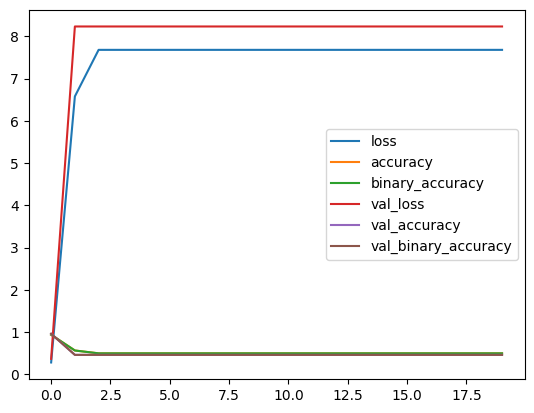

In [14]:
import pandas as pd 

pd.DataFrame(history.history).plot()